# research questions

# data exploration

In [82]:
import pandas as pd

from utils import *

set_env()

filepath = get_current_dir().parent / "data" / "final_n1000.csv"
df = pd.read_csv(filepath)

print(df.dtypes)

for col in df.columns:
    print(f"\n{col}:")
    print(f"\tunique values: {df[col].nunique()}")
    print(f"\tmissing values: {df[col].isnull().sum()}")
    print(f"\tmost common values: {list(df[col].value_counts().head(5).index)}")

df

rating               float64
title                 object
text                  object
timestamp             object
helpful_vote           int64
verified_purchase       bool
category              object
dtype: object

rating:
	unique values: 5
	missing values: 0
	most common values: [5.0, 4.0, 3.0, 1.0, 2.0]

title:
	unique values: 2937
	missing values: 0
	most common values: ['Five Stars', 'Four Stars', 'Great', 'Nice', 'Good']

text:
	unique values: 3356
	missing values: 0
	most common values: ['Great', 'As expected', 'Good product', '👍', "I hate to &#34;review&#34; movies cause it's subjective... so honestly, I just like this movie.  If you like the actors in this film, you'll probably like this movie."]

timestamp:
	unique values: 3399
	missing values: 0
	most common values: ['2020-03-11 13:07:22.329', '2020-07-01 21:25:15.026', '2019-09-21 17:48:27.808', '2020-01-12 21:55:48.239', '2018-10-24 23:40:40.967']

helpful_vote:
	unique values: 50
	missing values: 0
	most common values: 

,rating,title,text,timestamp,helpful_vote,verified_purchase,category
0,4.0,Soft,I wear headbands like this in the evening when...,2020-03-11 13:07:22.329,0,False,All_Beauty
1,4.0,"TRY THIS! test on FACE for match not hands, ev...",I first tried it on the back of my hand and wa...,2021-02-02 14:58:16.403,0,False,All_Beauty
2,5.0,Excellent product,This is so very good for my hair,2021-11-26 18:52:21.170,0,True,All_Beauty
3,5.0,Five Stars,My daughter loves the foot pedicure unit.,2017-02-13 15:26:12.000,0,True,All_Beauty
4,5.0,Awesome foundation!,I am so glad they made a product like this bec...,2019-09-17 16:38:04.832,7,True,All_Beauty
...,...,...,...,...,...,...,...
3394,5.0,Pocahontas (plus bonus content),I am huge disney movie fan and Pocahontas is o...,2021-05-16 01:47:01.926,3,True,Movies_and_TV
3395,5.0,Caddyshack,I purchased this one cause it's a real classic...,2022-04-08 03:38:03.049,0,True,Movies_and_TV
3396,2.0,Very Strange Story,Tell me what you think of this plot: A child ...,2008-10-05 04:27:14.000,2,False,Movies_and_TV
3397,5.0,Attention grabbing missing person mystery!,"Well done, interesting mystery that focuses on...",2015-09-16 22:57:12.000,0,True,Movies_and_TV


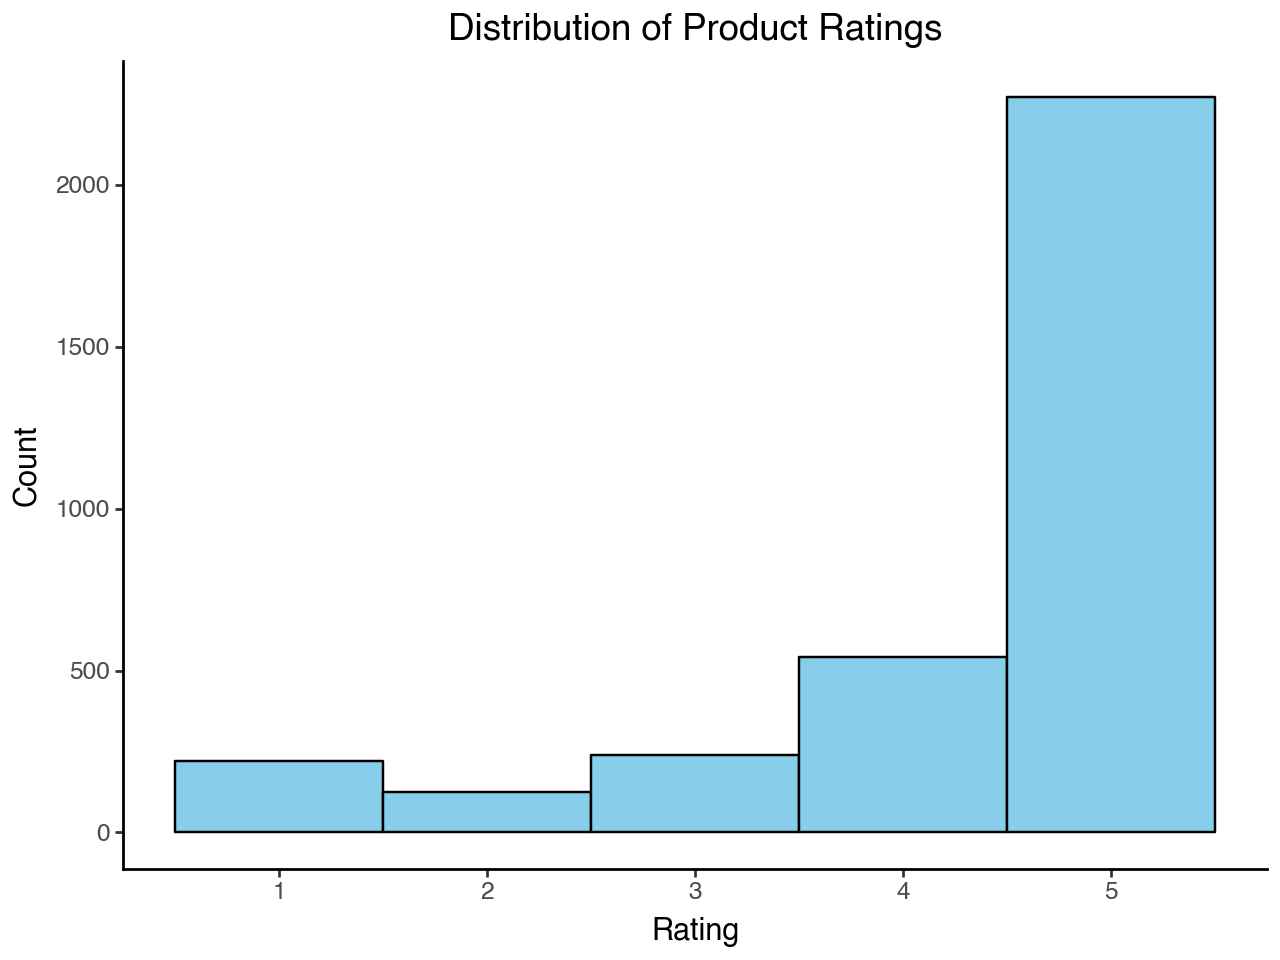

In [83]:
from plotnine import *

(ggplot(df, aes(x="rating")) + geom_histogram(binwidth=1, fill="skyblue", color="black") + labs(title="Distribution of Product Ratings", x="Rating", y="Count") + theme_classic())

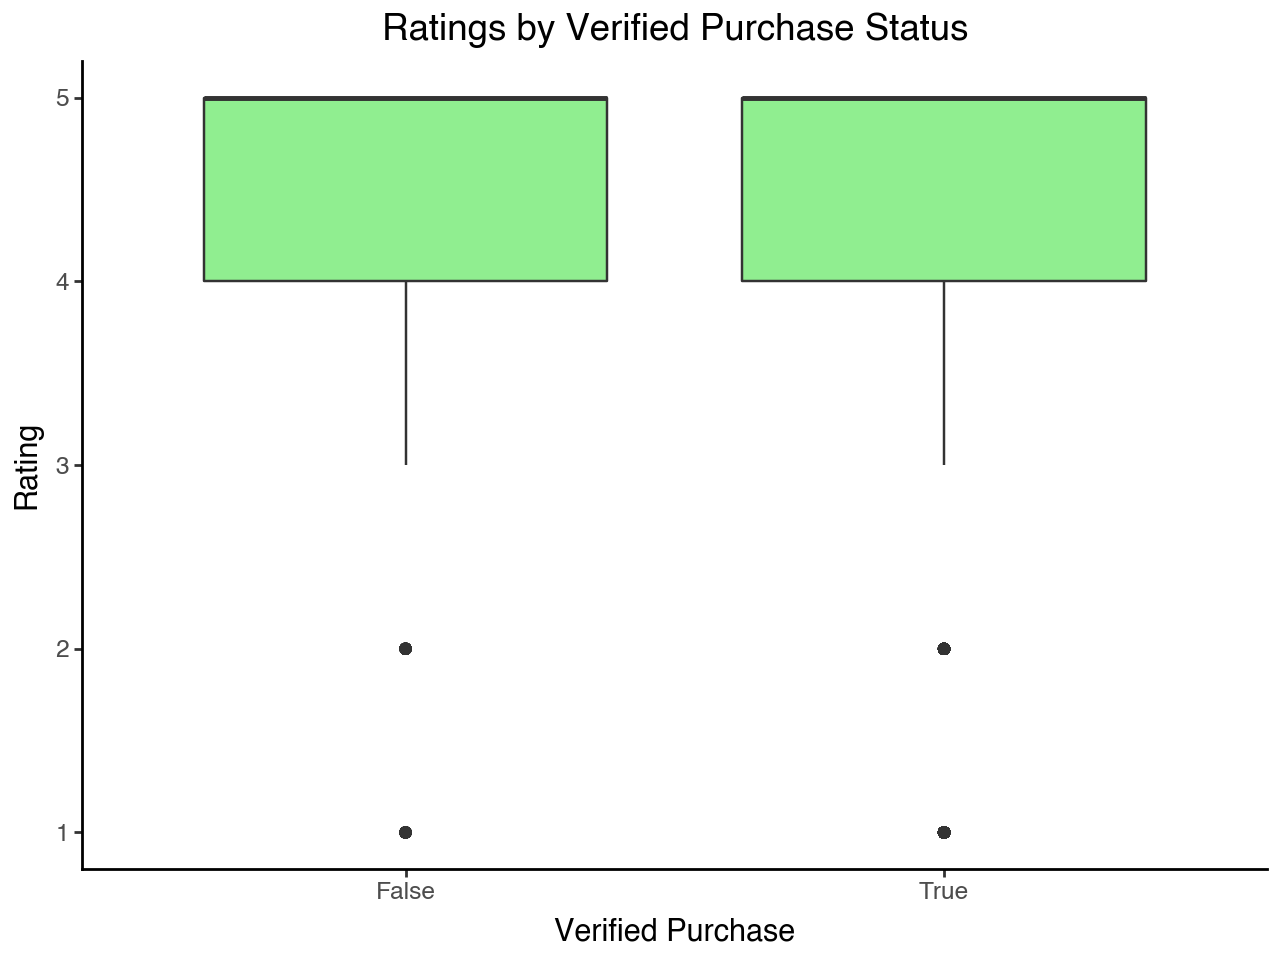

In [84]:
(ggplot(df, aes(x="verified_purchase", y="rating")) + geom_boxplot(fill="lightgreen") + labs(title="Ratings by Verified Purchase Status", x="Verified Purchase", y="Rating") + theme_classic())

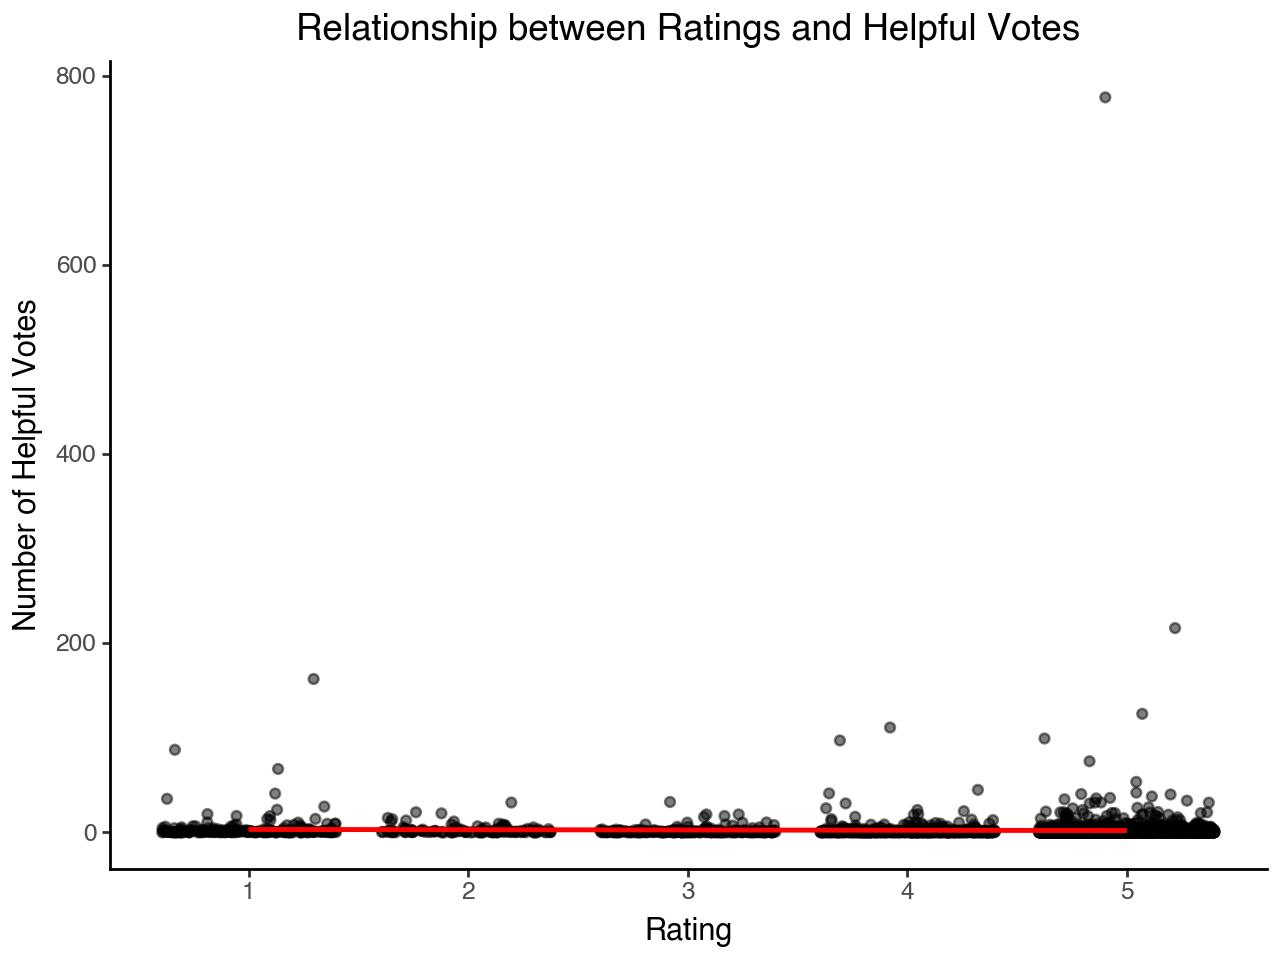

In [85]:
(ggplot(df, aes(x="rating", y="helpful_vote")) + geom_jitter(alpha=0.5) + geom_smooth(method="lm", color="red") + labs(title="Relationship between Ratings and Helpful Votes", x="Rating", y="Number of Helpful Votes") + theme_classic())

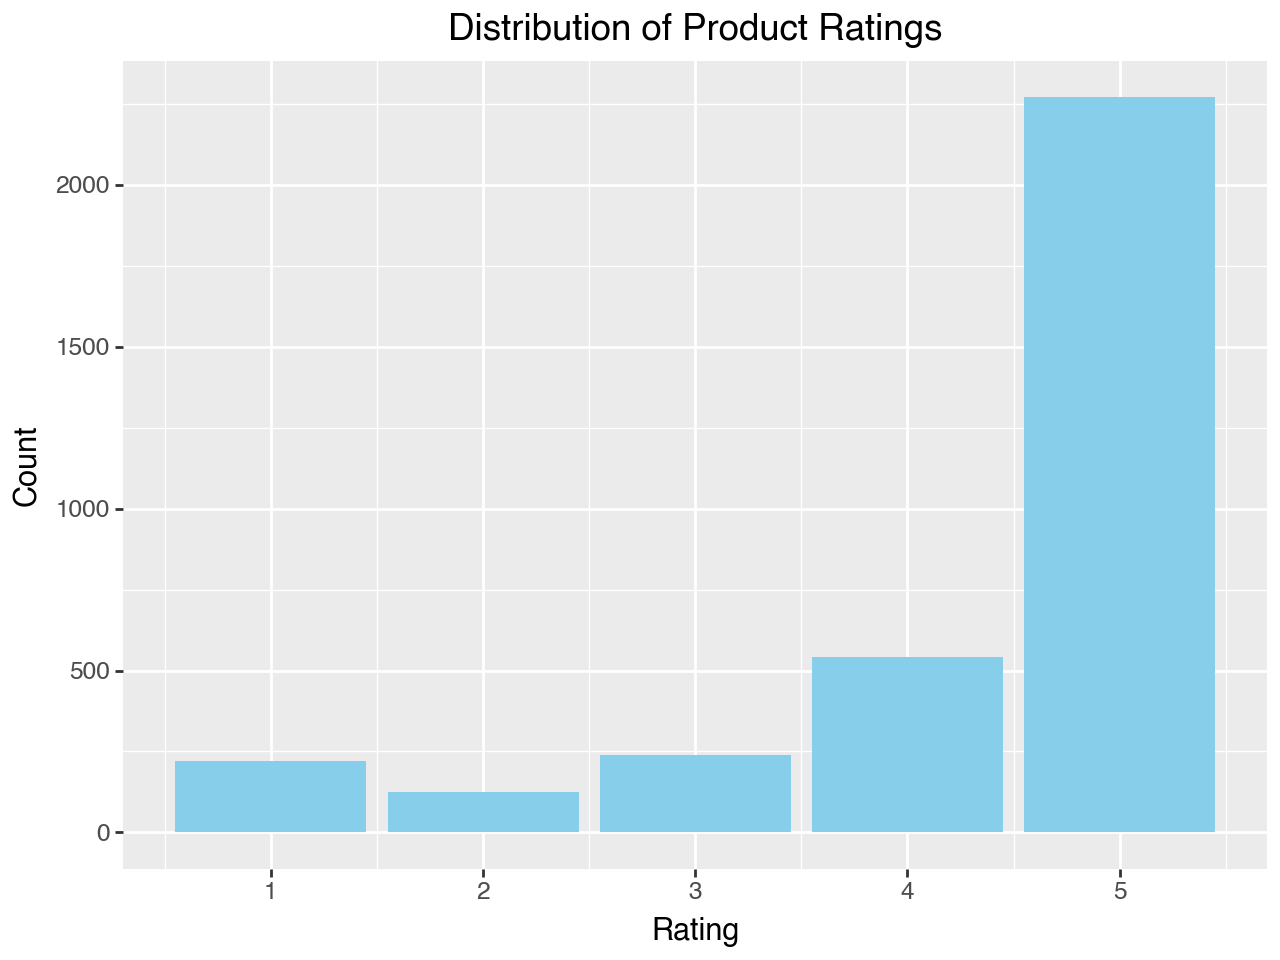

In [86]:
(ggplot(df, aes(x="rating")) + geom_bar(fill="skyblue") + labs(title="Distribution of Product Ratings", x="Rating", y="Count"))

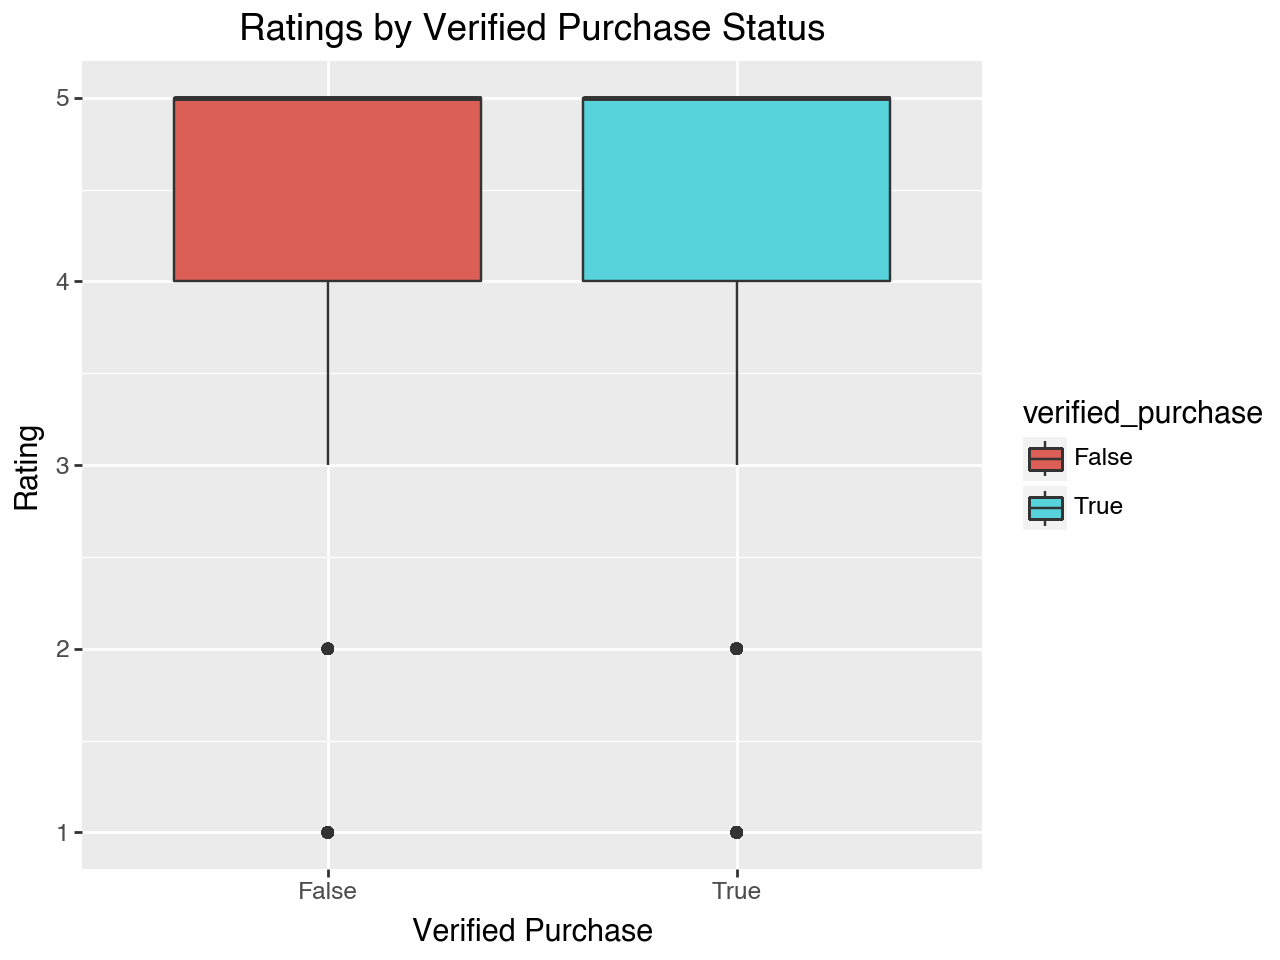

In [87]:
(ggplot(df, aes(x="verified_purchase", y="rating", fill="verified_purchase")) + geom_boxplot() + labs(title="Ratings by Verified Purchase Status", x="Verified Purchase", y="Rating"))

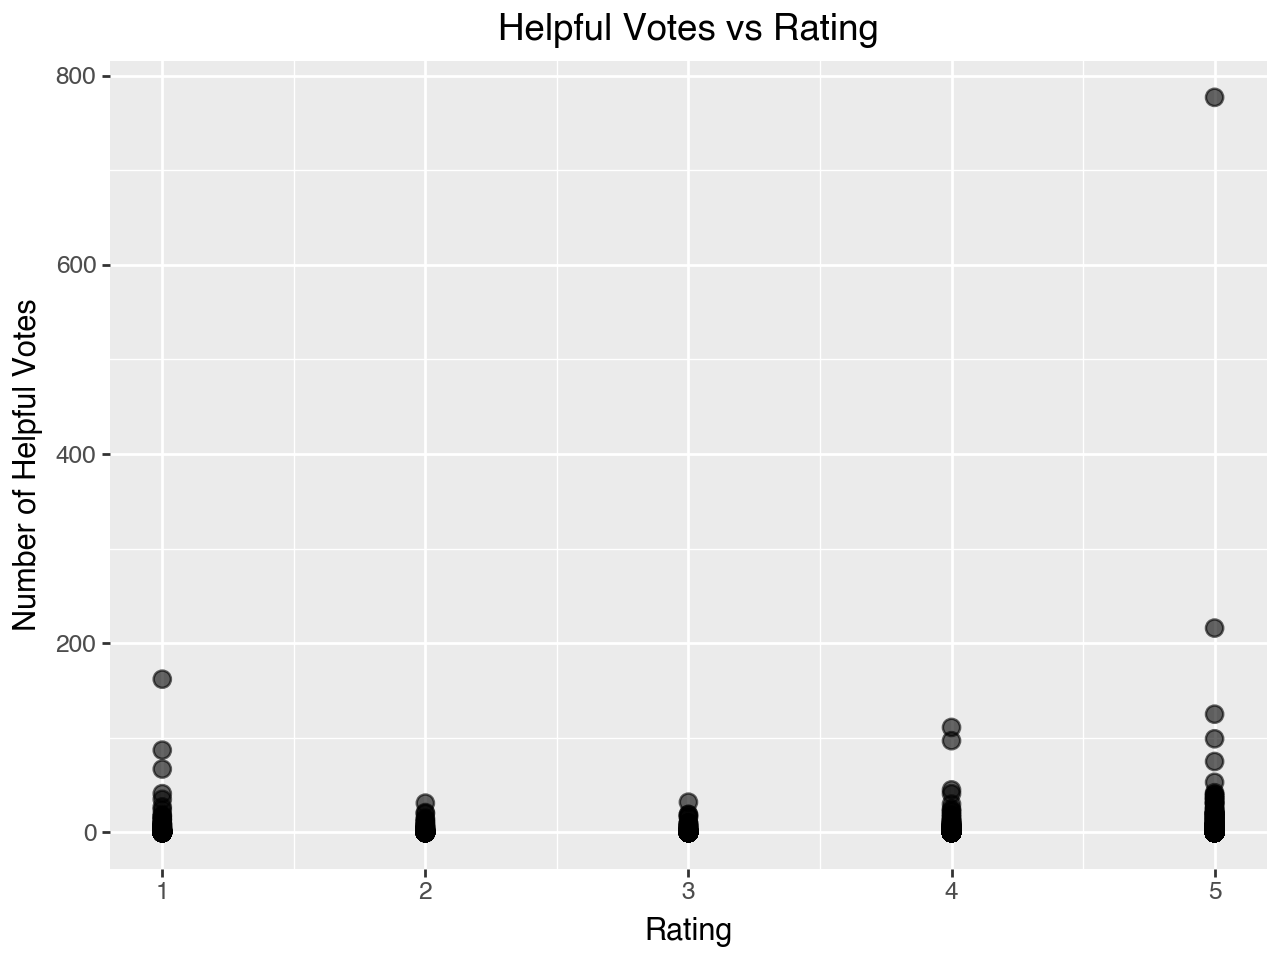

In [88]:
(ggplot(df, aes(x="rating", y="helpful_vote")) + geom_point(size=3, alpha=0.6) + labs(title="Helpful Votes vs Rating", x="Rating", y="Number of Helpful Votes"))